In [177]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [192]:
header = ['dataset', 'lr', 'num_epochs', 'oversampling_ratio', \
 'num_layers', 'dropout', 'model_type', 'batch_size', 'only_binary', \
'exp_name', 'standardize', 'features', 'time_cutoff', 'seed', 'hidden_dim']
header_acc = ["train_acc", "val_acc", "test_acc"]

In [257]:
df = pd.read_csv("new_results.csv")
df_temp = df.copy()
df_temp["index"] = df_temp.index
df_temp_melt = pd.melt(df_temp, value_name="Accuracy", value_vars=header_acc, id_vars=header+["index"], var_name="split")



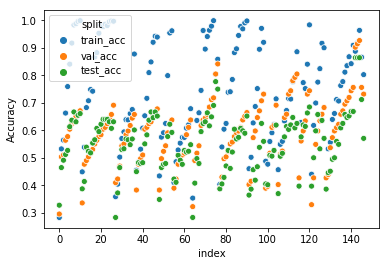

In [258]:
sns.scatterplot(data=df_temp_melt, x="index", y="Accuracy", hue="split")

In [259]:
df_final = df.drop_duplicates(subset=header, keep="last")

In [260]:
for col in df_final.columns:
    print(col, df_final[col].unique())
df_final.describe()

dataset ['twitter15' 'twitter16']
lr [0.01]
num_epochs [500]
oversampling_ratio [1]
num_layers [2]
dropout [0.]
model_type ['GAT' 'GraphSage' 'GCN']
batch_size [32]
only_binary [False]
exp_name ['final' 'final_text_only_GAT' 'final_user_only_GAT'
 'final15_all_GraphSage' 'final15_text_only_GraphSage'
 'final15_user_only_GraphSage' 'final15_all_GCN' 'final16_all_GCN'
 'final15_text_only_GCN' 'final16_text_only_GCN' 'final15_user_only_GCN'
 'final16_user_only_GCN' 'final16_all_GAT' 'final16_text_only_GAT'
 'final16_user_only_GAT' 'final16_all_GraphSage'
 'final16_text_only_GraphSage' 'final16_user_only_GraphSage']
standardize [ True]
features ['all' 'text_only' 'user_only']
time_cutoff ['None']
seed [64 43]
hidden_dim [64]
train_acc [0.99900498 0.99701493 0.87761194 0.93930348 0.96218905 0.67860697
 0.85869565 0.99800995 0.92028986 0.71442786 0.88586957 0.98369565
 0.90036232 0.90942029 0.96376812 0.86594203 0.80253623]
val_acc [0.67114094 0.69127517 0.65771812 0.67785235 0.63758389 0.71

,lr,num_epochs,oversampling_ratio,num_layers,dropout,batch_size,seed,hidden_dim,train_acc,val_acc,test_acc
count,1.800000e+01,18.0,18.0,18.0,18.0,18.0,18.000000,18.0,18.000000,18.000000,18.000000
mean,1.000000e-02,500.0,1.0,2.0,0.0,32.0,57.000000,64.0,0.903097,0.723477,0.647293
std,1.785016e-18,0.0,0.0,0.0,0.0,0.0,10.186496,0.0,0.094543,0.075035,0.077363
min,1.000000e-02,500.0,1.0,2.0,0.0,32.0,43.000000,64.0,0.678607,0.637584,0.547619
25%,1.000000e-02,500.0,1.0,2.0,0.0,32.0,43.000000,64.0,0.868860,0.672819,0.594494
50%,1.000000e-02,500.0,1.0,2.0,0.0,32.0,64.000000,64.0,0.914855,0.704698,0.641369
75%,1.000000e-02,500.0,1.0,2.0,0.0,32.0,64.000000,64.0,0.978714,0.753049,0.680707
max,1.000000e-02,500.0,1.0,2.0,0.0,32.0,64.000000,64.0,0.999005,0.926829,0.864130


In [261]:
df_melt = pd.melt(df_final, value_name="Accuracy", value_vars=header_acc, id_vars=header, var_name="split")
df_melt["split"] = [x.split("_")[0] for x in df_melt["split"]]

In [262]:
df_melt["Model"] = df_melt["model_type"] + "\n" + df_melt["features"]

In [263]:
df_melt[df_melt.Model=="GCN" + "\n" + "all"]

,dataset,lr,num_epochs,oversampling_ratio,num_layers,dropout,model_type,batch_size,only_binary,exp_name,standardize,features,time_cutoff,seed,hidden_dim,split,Accuracy,Model
6,twitter15,0.01,500,1,2,0.0,GCN,32,False,final15_all_GCN,True,all,None,64,64,train,0.999005,GCN\nall
7,twitter16,0.01,500,1,2,0.0,GCN,32,False,final16_all_GCN,True,all,None,43,64,train,0.858696,GCN\nall
24,twitter15,0.01,500,1,2,0.0,GCN,32,False,final15_all_GCN,True,all,None,64,64,val,0.718121,GCN\nall
25,twitter16,0.01,500,1,2,0.0,GCN,32,False,final16_all_GCN,True,all,None,43,64,val,0.841463,GCN\nall
42,twitter15,0.01,500,1,2,0.0,GCN,32,False,final15_all_GCN,True,all,None,64,64,test,0.690476,GCN\nall
43,twitter16,0.01,500,1,2,0.0,GCN,32,False,final16_all_GCN,True,all,None,43,64,test,0.750000,GCN\nall


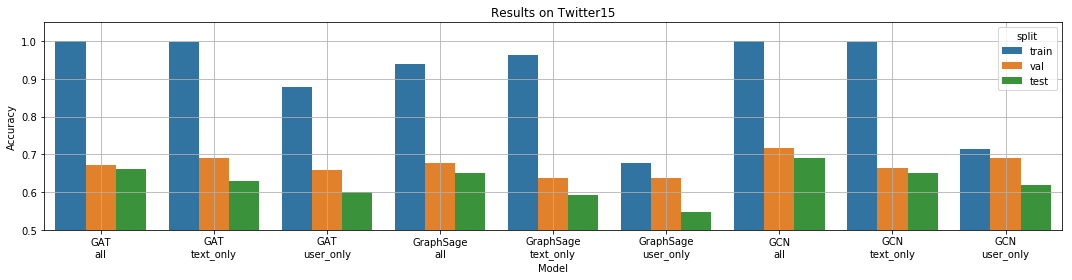

In [266]:
fig = plt.figure(figsize=(15, 4))
sns.barplot(data=df_melt[df_melt.dataset=="twitter15"], y="Accuracy", x="Model", hue="split")
plt.ylim([0.5, None]);
plt.title("Results on Twitter15")
plt.grid()
plt.tight_layout()
plt.savefig("grid15_feature_model.png", transparent=True, dpi=400)

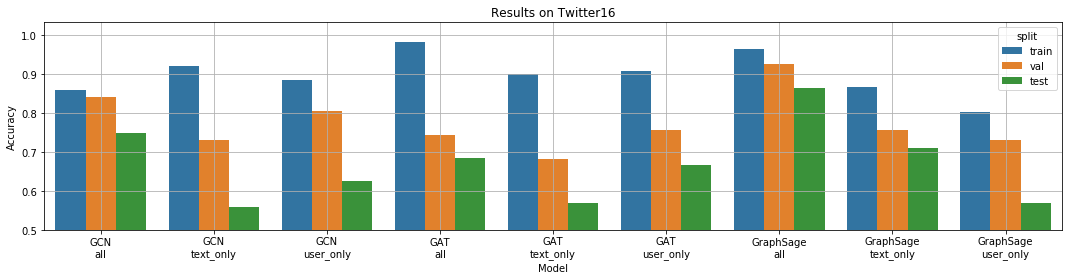

In [267]:
fig = plt.figure(figsize=(15, 4))
sns.barplot(data=df_melt[df_melt.dataset=="twitter16"], y="Accuracy", x="Model", hue="split")
plt.ylim([0.5, None]);
plt.title("Results on Twitter16")
plt.grid()
plt.tight_layout()
plt.savefig("grid16_feature_model.png", transparent=True, dpi=400)


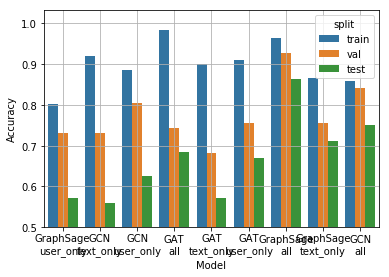

In [240]:
sns.barplot(data=df_melt[df_melt.dataset=="twitter16"], y="Accuracy", x="Model", hue="split")
plt.ylim([0.5, None]);
plt.grid()

In [153]:
sns.scatterplot(data=df_melt, x="index", y="Accuracy", hue="split")

ValueError: Could not interpret input 'index'

In [66]:
df16

,dataset,lr,num_epochs,oversampling_ratio,num_layers,dropout,model_type,batch_size,only_binary,exp_name,standardize,features,time_cutoff,hidden_dim,train_acc,val_acc,test_acc,index
0,twitter16,0.0100,500,1,2,0.0,GAT,32,False,text_only_500_16_2,False,text_only,0.25,0.219512,0.244565,NaN,NaN,0
1,twitter16,0.0100,500,1,2,0.0,GAT,32,False,text_only_500_16_2,False,text_only,0.5778985507246377,0.621951,0.516304,NaN,NaN,1
2,twitter16,0.0100,500,1,2,0.0,GAT,32,False,text_only_500_16_2,False,text_only,0.8804347826086957,0.646341,0.635870,NaN,NaN,2
3,twitter16,0.0100,500,1,2,0.0,GAT,32,False,text_only_500_16_2,False,text_only,0.8442028985507246,0.658537,0.603261,NaN,NaN,3
4,twitter16,0.0100,500,1,2,0.0,GAT,32,False,text_only_500_16_2,False,text_only,0.8985507246376812,0.682927,0.625000,NaN,NaN,4
5,twitter16,0.0100,500,1,2,0.0,GAT,32,False,text_only_500_16_2,False,text_only,0.967391304347826,0.841463,0.673913,NaN,NaN,5
6,twitter16,0.0001,500,1,2,0.1,GAT,32,False,all_500_16_2_test,True,all,None,64.000000,0.393116,0.304878,0.347826,6
7,twitter16,0.0001,500,1,2,0.1,GAT,32,False,all_500_16_2_test,True,all,None,64.000000,0.467391,0.365854,0.391304,7
8,twitter16,0.0001,500,1,2,0.1,GAT,32,False,all_500_16_2_test,True,all,None,64.000000,0.523551,0.390244,0.434783,8
9,twitter16,0.0001,500,1,2,0.1,GAT,32,False,all_500_16_2_test,True,all,None,64.000000,0.532609,0.402439,0.467391,9


Text(0.5, 0, 'Record (best val acc)')

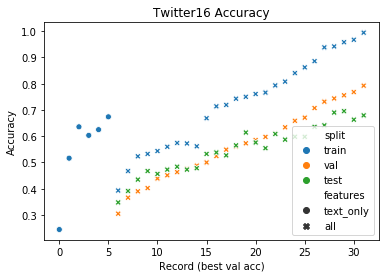

In [64]:
sns.scatterplot(data=df_melt16, x="index", y="Accuracy", hue="split", style="features")
plt.title("Twitter16 Accuracy")
plt.xlabel("Record (best val acc)")

In [7]:
df_early = pd.read_csv("earlydetec_results.csv")

In [11]:
df_early = df_early.drop_duplicates(subset=header, keep="last")

In [13]:
df_melt = pd.melt(df_early, value_name="Accuracy", value_vars=header_acc, id_vars=header, var_name="split")

In [28]:
df_melt["time_cutoff"] = df_melt["time_cutoff"].astype(float)

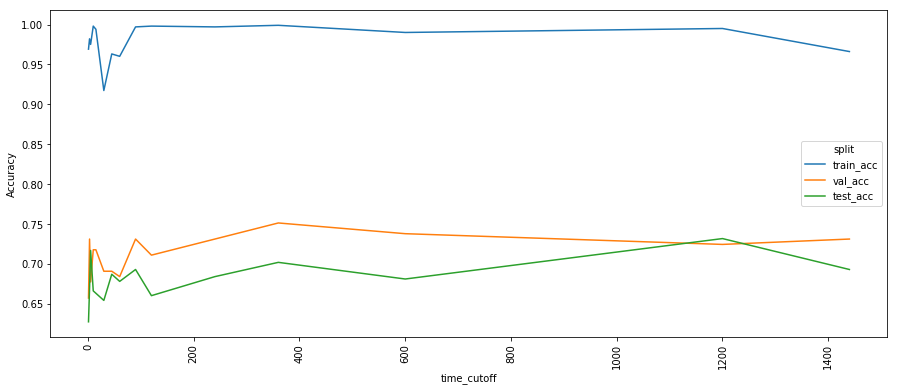

In [29]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_melt[df_melt.features=="all"], y="Accuracy", x="time_cutoff", hue="split")
plt.xticks(rotation=90);